In [57]:
#python 3
import numpy as np
import matplotlib.pyplot as plt
import random

In [10]:
def ROC_AUC(f, X, y):
    '''
    X - np.array [][] float
    y - np.array int
    f - function
    '''
    D = []
    tp = [0]
    fp = [0]
    auc = 0
    lp = 0
    lm = 0
    for i in range(X.shape[0]):
        D.append((X[i], y[i]))
        if (y[i] == 1):
            lp += 1
        else:
            lm += 1
    D = sorted(D, key=lambda x : f(x[0]))
    
    
    for i in range(len(D)):
        if (D[i][1] == -1):
            fp.append(fp[i] + 1.0/lm)
            tp.append(tp[i])
            auc += 1.0/lm*tp[i]
        else:
            fp.append(fp[i])
            tp.append(tp[i] + 1/lp)
            
    return (np.array(fp), np.array(tp), auc)

In [58]:
def f(x):
    return x[0]

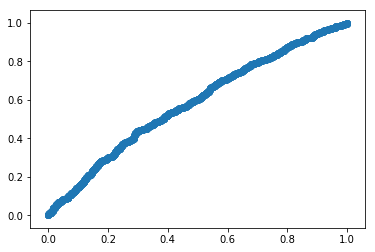

In [63]:
X = [[random.gauss(mu=1, sigma=10), random.gauss(mu=1, sigma=10)] for i in range(1000)]
X += [[random.gauss(mu=4, sigma=10), random.gauss(mu=7, sigma=10)] for i in range(1000)]
X = np.array(X)
y = [1 for i in range(1000)] + [-1 for i in range(1000)]
y = np.array(y)
fp, tp, auc = ROC_AUC(f, X, y)
plt.scatter(fp, tp)
plt.show()